In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data (if we have time, come back and look at datatypes and if there is a specific way we want to handle them)
column_names = pd.read_csv('raw_data/column_names.csv', sep=':', header=None)
actual_column_names = column_names.iloc[:,0].tolist()
raw_census_data_learn = pd.read_csv('raw_data/census_income_learn.csv', header=None, names=actual_column_names)
print(raw_census_data_learn.shape[0])
print(raw_census_data_learn.duplicated().sum())
raw_census_data_test = pd.read_csv('raw_data/census_income_test.csv', header=None, names=actual_column_names)
print(raw_census_data_test.shape[0])
print(raw_census_data_test.duplicated().sum())
raw_census_data_all = pd.concat([raw_census_data_learn, raw_census_data_test], ignore_index=True)
# raw_census_data_all.head().to_csv("raw_data/census_income_all_preview.csv", ",", index=False)
pd.set_option('display.max_columns', None)
# raw_census_data_all.head()
# raw_census_data_all
distinct_counts = raw_census_data_all.select_dtypes(include='object').nunique()
print(distinct_counts)

# check for missing values
raw_census_data_all.isnull().sum()

# Notes for morley. We've got our data metadata so were validating what were seeing against that.
# The dataset is weighted and is unbalanced so this needs to be taken into account. 
# There appears to be duplicates in the data so lets remove them

199523
3229
99762
883
class of worker                                9
education                                     17
enroll in edu inst last wk                     3
marital stat                                   7
major industry code                           24
major occupation code                         15
race                                           5
hispanic origin                               10
sex                                            2
member of a labor union                        3
reason for unemployment                        6
full or part time employment stat              8
tax filer stat                                 6
region of previous residence                   6
state of previous residence                   51
detailed household and family stat            38
detailed household summary in household        8
migration code-change in msa                  10
migration code-change in reg                   9
migration code-move within reg                1

In [ ]:
# when we looked at the raw data we saw a similar number of records, the business decsion was made to only include the most recent data, we could do a future investiation to see if this changes year over year
raw_census_data_95 = raw_census_data_all[raw_census_data_all['year'] == 95]

# Remove all people who are under the legal working age of 14? Nah, peopled who are this age might have money from investments from their parents
raw_census_data_over_14 = raw_census_data_95[raw_census_data_95['age'] >= 14]

# We can just check the actual income fields we have to see if a group has made any money
# filter dataset so that each row has at least >0 for the following columns summed: wage per hour, capital gains, dividends from stocks
# raw_census_data_income_recorded = raw_census_data_95[(raw_census_data_95['wage per hour'] > 0) | (raw_census_data_95['capital gains'] > 0) | (raw_census_data_95['dividends from stocks'] > 0)]

# print("Before removing those who make money: {:,.2f}".format(raw_census_data_95['instance weight'].sum()))
# print("After: {:,.2f}".format(raw_census_data_income_recorded['instance weight'].sum()))


# Drop duplicates, each row should be unqiue (Might need to revisit to see what they mean about this because my duplicate analysis doesnt line up with theirs)
raw_census_data_over_14 = raw_census_data_over_14.drop_duplicates()

# after talking with the business they believe that these features will have the biggest impact on weather or not someone makes over or under 50K a year.
columns_to_keep = ['sex', 'full or part time employment stat', 'age', 'member of a labor union', 'country of birth self', 'education', 'major occupation code', 'wage per hour', 'year', 'instance weight', 'target']
raw_census_data_income_recorded_slim = raw_census_data_over_14[columns_to_keep]

# dont know how much data validation I should be doing here but lets move on.
# lets strip all spacing and replace it with underscores in our fields with spaces. I want no space at the start, no space at the end then the space's between words will be underscores
for column in raw_census_data_income_recorded_slim.select_dtypes(include='object').columns:
    raw_census_data_income_recorded_slim[column] = raw_census_data_income_recorded_slim[column].str.strip()

# Going to update our target value to be 0 or 1 I'll wait to do this until we have a better understanding of the data
# raw_census_data_all['target'] = raw_census_data_all['target'].replace({'-50000': 0, '50000': 1})

raw_census_data_income_recorded_slim.to_csv("raw_data/census_income_all_cleaned.csv", ",", index=False, header=True)


/var/folders/58/sz04nswx0ys7gx6frmv625t00000gn/T/ipykernel_91967/4209463149.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_census_data_income_recorded_slim[column] = raw_census_data_income_recorded_slim[column].str.strip()
/var/folders/58/sz04nswx0ys7gx6frmv625t00000gn/T/ipykernel_91967/4209463149.py:30: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  raw_census_data_income_recorded_slim.to_csv("raw_data/census_income_all_cleaned.csv", ",", index=False, header=True)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

census_income_all = pd.read_csv('raw_data/census_income_all_cleaned.csv')

In [4]:
print(census_income_all['sex'].value_counts())
print(census_income_all['full or part time employment stat'].value_counts())

NameError: name 'census_income_all' is not defined

In [114]:
# Plan now is to plot all of my key features to get an understanding of the data

print(census_income_all['sex'].value_counts())
print(census_income_all['full or part time employment stat'].unique())

# grouped_data = census_income_all.groupby(['sex'])['instance weight'].sum().reset_index()
# print(grouped_data)
# print(grouped_data.info())

# grouped_data.plot(kind='bar', x='sex', y='instance weight')

# plt.xlabel('Sex')
# plt.ylabel('Instance Weight')
# plt.title('Instance Weight by Sex')
# plt.legend().set_visible(False)
# plt.show()

sex
Female    61408
Male      54890
Name: count, dtype: int64
['Not in labor force' 'Full-time schedules' 'Unemployed full-time'
 'Unemployed part- time' 'PT for non-econ reasons usually FT'
 'Children or Armed Forces' 'PT for econ reasons usually PT'
 'PT for econ reasons usually FT']


/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

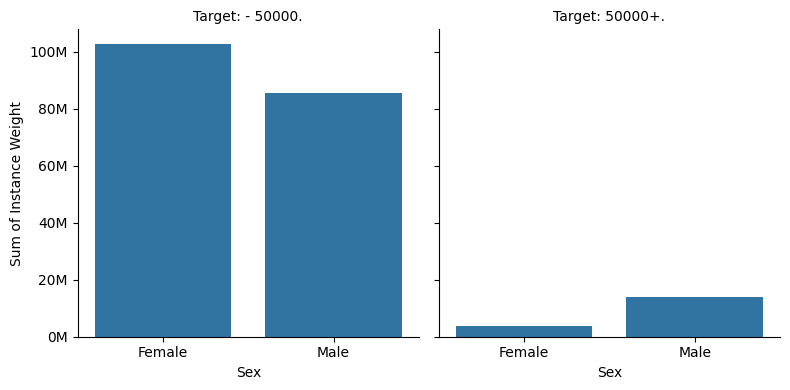

<Figure size 800x600 with 0 Axes>

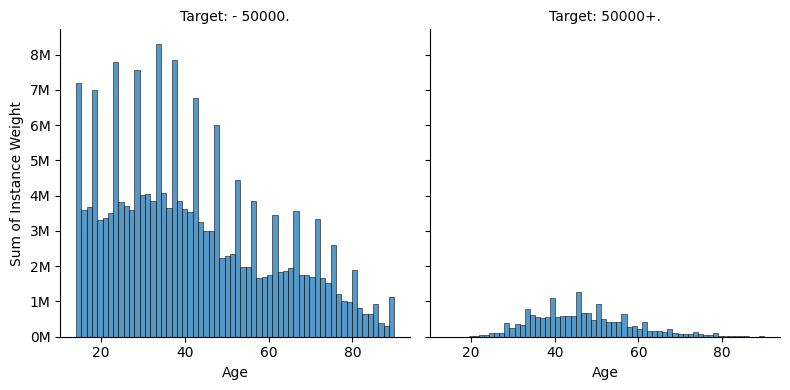

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

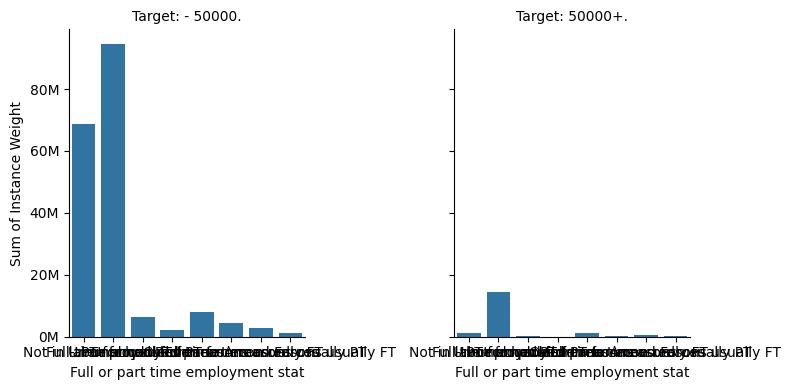

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

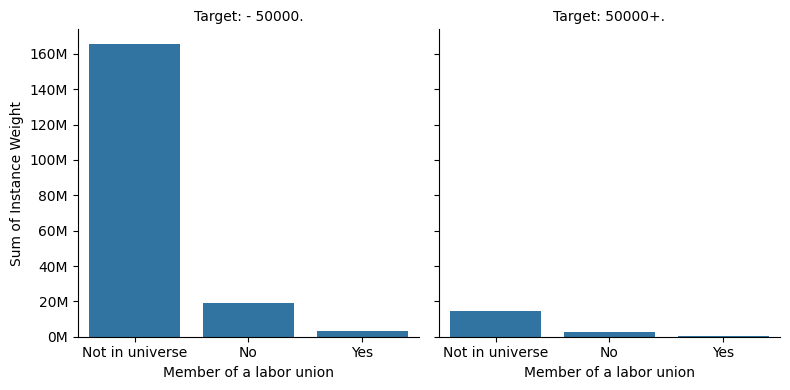

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

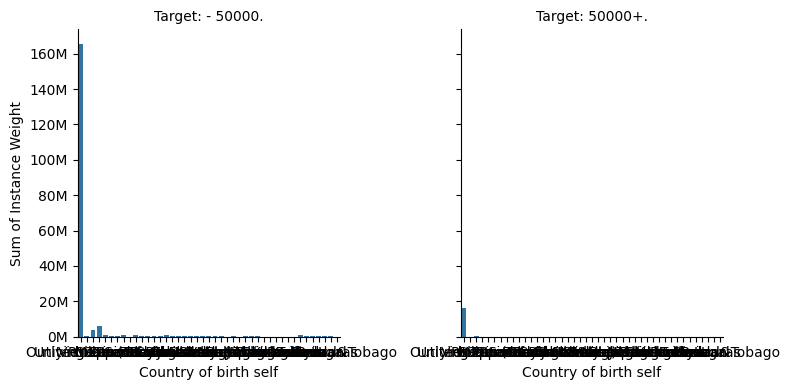

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

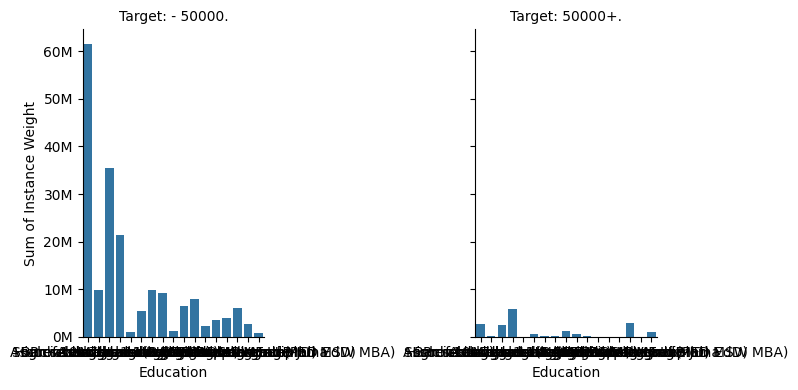

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

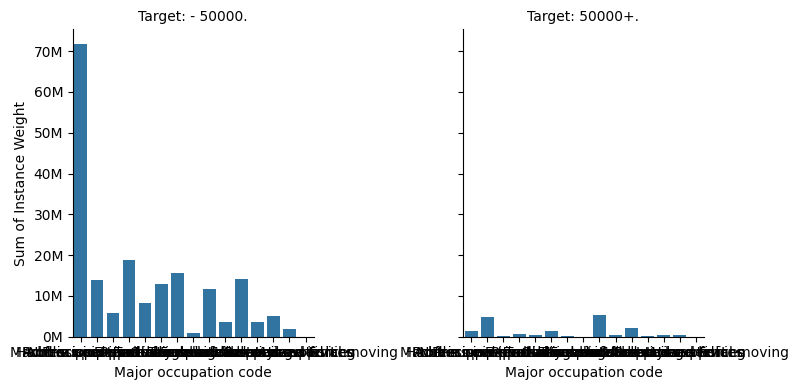

<Figure size 800x600 with 0 Axes>

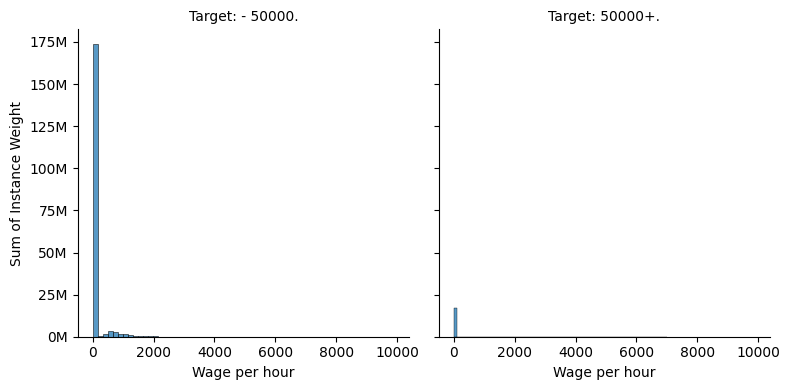

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# List of features to plot
features = ['sex', 'age','full or part time employment stat', 'member of a labor union', 'country of birth self', 'education', 'major occupation code', 'wage per hour']

# Define formatter function for millions
millions_formatter = mtick.FuncFormatter(lambda x, pos: f'{int(x*1e-6)}M')

for feature in features:
    plt.figure(figsize=(8, 6))
    
    if census_income_all[feature].dtype == 'object':
        # Categorical feature: use bar plot with FacetGrid
        g = sns.FacetGrid(census_income_all, col="target", height=4, aspect=1)
        g.map(sns.barplot, feature, 'instance weight', estimator=sum, ci=None)
        g.set_axis_labels(feature.capitalize(), 'Sum of Instance Weight')
        g.set_titles(col_template="Target: {col_name}")
    else:
        # Numerical feature: use histogram with FacetGrid
        g = sns.FacetGrid(census_income_all, col="target", height=4, aspect=1)
        g.map(sns.histplot, feature, weights=census_income_all['instance weight'], bins=60, kde=False)
        g.set_axis_labels(feature.capitalize(), 'Sum of Instance Weight')
        g.set_titles(col_template="Target: {col_name}")
    
    # Apply the millions formatter to y-axis
    for ax in g.axes.flatten():
        ax.yaxis.set_major_formatter(millions_formatter)
    
    plt.tight_layout()
    plt.show()

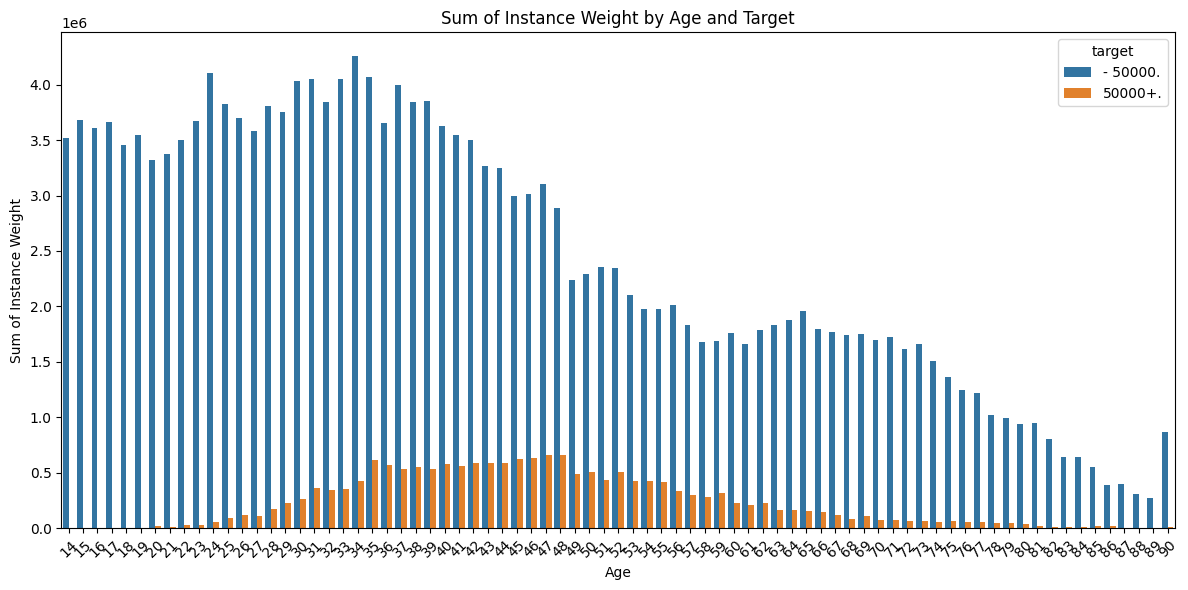

In [134]:
# Quickly looking into why age seems so odd.
plt.figure(figsize=(12, 6))

# Group the data by age and target, then sum the instance weights
age_grouped = census_income_all.groupby(['age', 'target'])['instance weight'].sum().reset_index()

# Create a bar plot
sns.barplot(data=age_grouped, x='age', y='instance weight', hue='target')

plt.xlabel('Age')
plt.ylabel('Sum of Instance Weight')
plt.title('Sum of Instance Weight by Age and Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

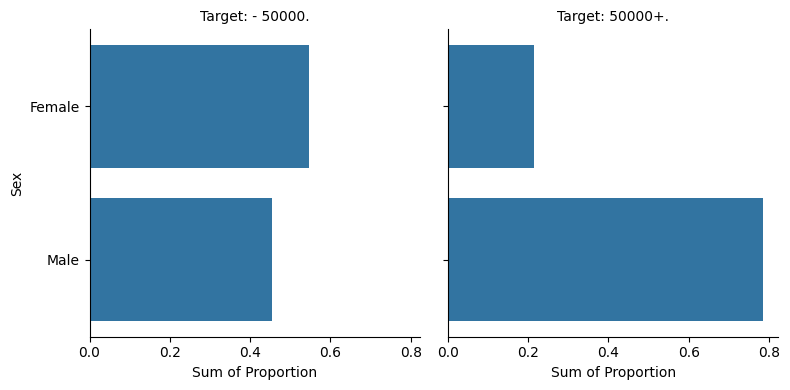

<Figure size 800x600 with 0 Axes>

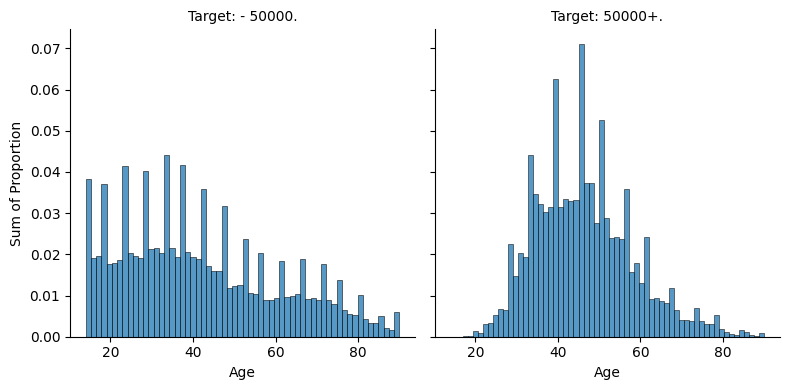

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

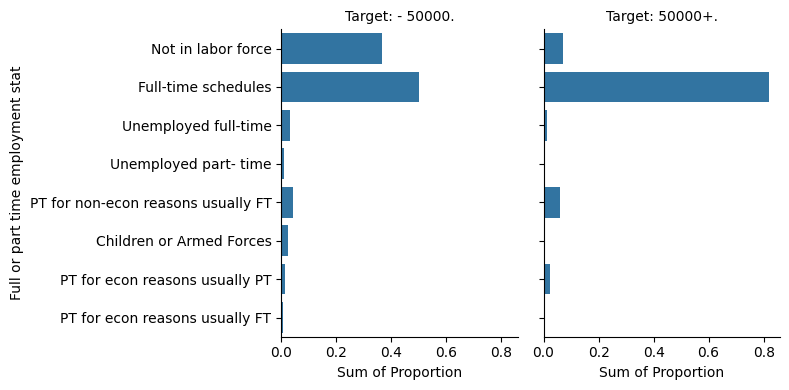

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

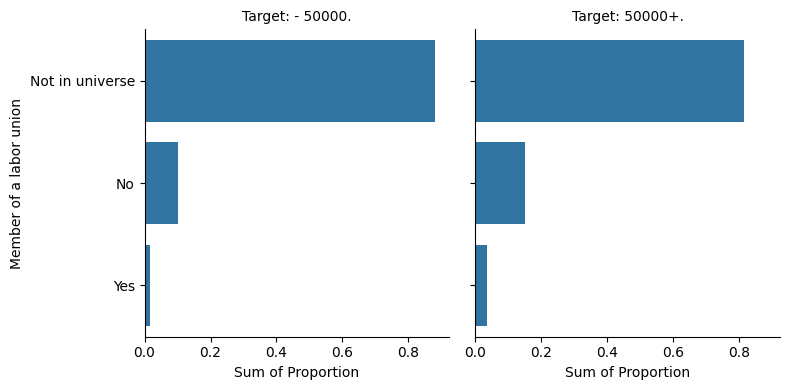

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

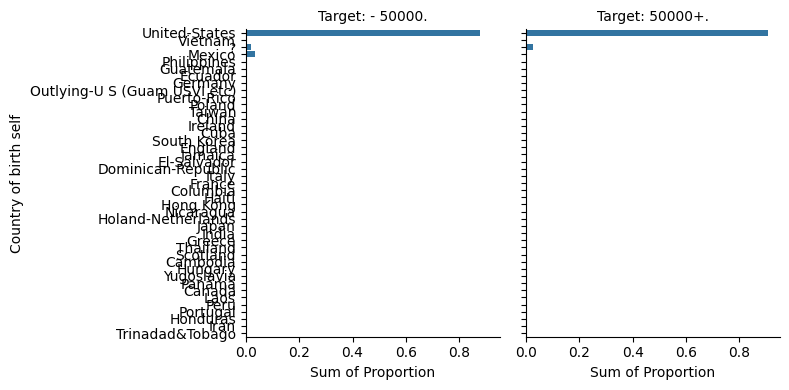

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

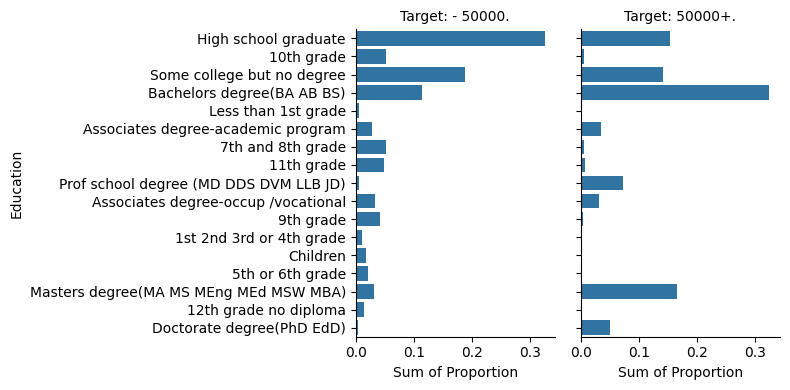

/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/morleypemberton/Projects/dataiku-casestudy/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

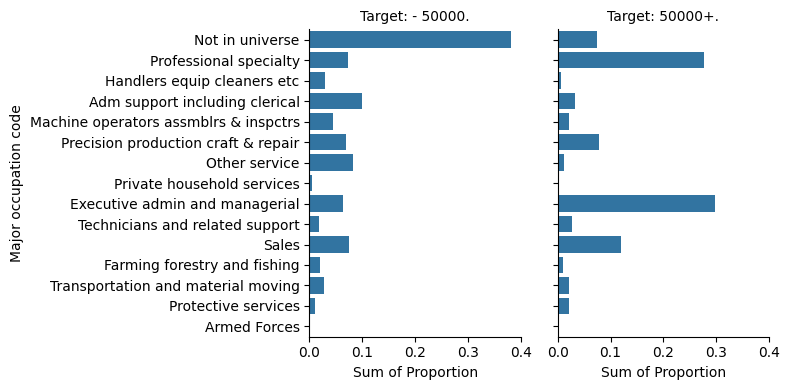

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# List of features to plot
features = ['sex', 'age', 'full or part time employment stat', 'member of a labor union', 'country of birth self', 'education', 'major occupation code']

# Define formatter function for millions
millions_formatter = mtick.FuncFormatter(lambda x, pos: f'{int(x*1e-6)}M')

# Calculate total instance weight for each target group
total_instance_weight_by_target = census_income_all.groupby('target')['instance weight'].sum()

# Add a column that is the proportion that row represents of the whole dataset for its target group
census_income_all['proportion'] = census_income_all.apply(lambda row: row['instance weight'] / total_instance_weight_by_target[row['target']], axis=1)

# Update the plotting code to use the new proportion column
for feature in features:
    plt.figure(figsize=(8, 6))
    
    if census_income_all[feature].dtype == 'object':
        # Categorical feature: use bar plot with FacetGrid
        g = sns.FacetGrid(census_income_all, col="target", height=4, aspect=1)
        g.map(sns.barplot, 'proportion', feature, estimator=sum, ci=None, orient='h')
        g.set_axis_labels('Sum of Proportion', feature.capitalize())
        g.set_titles(col_template="Target: {col_name}")
    else:
        # Numerical feature: use histogram with FacetGrid
        g = sns.FacetGrid(census_income_all, col="target", height=4, aspect=1)
        g.map(sns.histplot, feature, weights=census_income_all['proportion'], bins=60, kde=False)
        g.set_axis_labels(feature.capitalize(), 'Sum of Proportion')
        g.set_titles(col_template="Target: {col_name}")
    
    plt.tight_layout()
    plt.show()